<a href="https://colab.research.google.com/github/Amenasetheru/Credit-Card-Transaction-Fraud-Detection-using-CNN/blob/master/Credit_Card_Transaction_Fraud_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Transaction Fraud Detection using CNN**

**Import Denpencies**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Download the Dataset
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/CNN Credit Card Transaction Fraud Detection/creditcard 2.csv")

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.shape

(284807, 31)

In [ ]:
# Check the null values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Check the number of classes in tha dataset
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

**We need to balance the dataset for it is highly imbalanced**

In [ ]:
no_fraud = data[data["Class"]==0]
fraud = data[data["Class"]==1]

In [ ]:
fraud.shape[0]

492

In [ ]:
no_fraud.shape, fraud.shape

((284315, 31), (492, 31))

To balance our dataset, we are going to select 492 rows from the no_fraud dataset and append it to fraud dataset.

Those selections must be random and to do that we use sample from pandas>

In [ ]:
no_fraud = no_fraud.sample(fraud.shape[0])
no_fraud.shape

(492, 31)

In [ ]:
# Merge these two dataset together
data = fraud.append(no_fraud, ignore_index=True)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,27704.0,-1.396655,1.491822,0.672095,1.064165,-0.441202,-0.725032,0.088745,0.640929,-1.042506,-0.516661,0.073737,1.003925,1.088385,0.755161,1.068370,-0.582674,0.540625,-0.577957,-0.122585,-0.298968,0.325588,0.788607,0.113663,0.653714,-0.317641,-0.357261,-0.281339,0.010510,20.00,0
980,564.0,-2.422708,2.544338,-0.509210,0.084550,-1.431677,-1.265684,-0.776953,1.697062,-0.399877,-0.466413,-0.836636,0.264950,-0.246808,0.747364,0.856408,0.844407,0.689971,0.039768,-0.196732,0.009865,-0.196938,-0.855361,0.224607,0.305455,0.065001,0.096890,0.072786,0.004235,9.99,0
981,166374.0,-0.119735,1.163854,-0.484352,-0.572719,0.903535,-0.915146,0.935974,-0.106462,0.127328,-0.523050,-0.606488,-0.025718,0.119310,-1.107100,-0.237997,0.290991,0.367805,-0.261275,-0.275867,0.158654,-0.365838,-0.841522,0.116173,0.629097,-0.369414,0.113573,0.324354,0.156794,2.28,0
982,76870.0,-1.500882,-0.109961,1.599557,-0.405910,5.190332,-4.265361,-5.207839,-1.799143,0.987598,0.980515,-0.654046,0.931738,-0.229886,0.185616,-0.475084,-0.459202,0.088562,-1.191284,-0.513519,-0.689389,1.535770,-1.472732,-8.727518,0.915397,-2.603818,0.613612,0.655793,0.292784,2.00,0


In [ ]:
data["Class"].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [ ]:
x = data.drop("Class", axis=1)
y = data["Class"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=y)

In [ ]:
x_train.shape, x_test.shape

((787, 30), (197, 30))

In [ ]:
x_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
845,169750.0,1.494712,-0.943940,-1.601964,0.595578,-0.307574,-1.180846,0.635951,-0.489974,0.533905,-0.141954,-0.671255,0.538822,0.611659,0.428368,0.765595,-0.144027,-0.561127,0.001623,-0.330961,0.399334,0.442804,0.788232,-0.278025,0.042278,0.167661,-0.133648,-0.069929,-0.004823,301.83
898,43773.0,1.083154,-0.258436,-0.417109,0.954341,0.535516,1.120447,-0.061272,0.303173,0.363125,0.051722,-0.632654,-0.130947,-1.371601,0.470723,-0.496966,0.056558,-0.528166,0.277716,0.556378,-0.050386,-0.130627,-0.425106,-0.343542,-1.738628,0.783259,-0.226349,0.008699,-0.000611,90.75
45,18399.0,-14.474437,6.503185,-17.712632,11.270352,-4.150142,-3.372098,-16.535807,-1.443947,-6.815273,-13.670545,10.545263,-15.022700,0.171633,-15.066374,-0.259576,-8.668739,-12.804141,-5.116620,0.579200,1.101250,-2.475962,0.342391,-3.564508,-0.818140,0.153408,0.755079,2.706566,-0.992916,1.00
536,146135.0,-3.619045,-4.020710,1.748468,-2.774926,3.336547,-3.807566,-2.087815,0.305767,2.083627,-2.238650,-1.124794,0.040238,-1.282728,0.323060,1.148160,-0.227687,-0.697201,0.813978,-0.390458,0.817974,0.557531,0.422387,0.236969,-0.054798,1.138012,-0.796171,-0.092176,0.131153,30.10
739,131233.0,-1.015938,1.023279,-0.106731,-0.198794,2.127830,4.947090,-1.361590,-1.510326,-0.543055,-0.707929,-0.321843,0.021958,-0.270060,0.548471,1.418443,0.090446,-0.382071,0.548912,0.020286,0.634443,-0.972111,1.212433,-0.173951,0.694928,-0.144648,-0.380596,0.103646,0.161816,57.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,59840.0,-3.215382,-0.364223,-1.261883,3.794949,0.711206,-1.316476,-5.165141,0.625278,-1.582301,-3.252634,5.040751,-5.314442,-0.656471,-6.233044,0.974771,-6.890318,-9.516411,-4.364128,2.598578,0.019626,0.401341,0.152191,-0.934675,-0.256148,-0.469403,-0.282496,0.866077,-0.433466,5.91
711,43385.0,-0.582934,-0.042738,2.094346,0.114737,-0.236308,2.609668,-0.437218,0.913229,0.059632,-0.505634,1.584034,0.556658,-0.733033,0.025057,1.536398,-1.508361,1.438828,-1.228913,0.900699,0.222600,0.157407,0.634584,0.152786,-1.281873,-0.784080,1.352501,0.128831,0.089368,84.95
31,12095.0,-4.727713,3.044469,-5.598354,5.928191,-2.190770,-1.529323,-4.487422,0.916392,-1.307010,-4.138891,5.149409,-11.124019,0.543068,-7.840942,0.743634,-6.777069,-9.931765,-4.093021,1.504925,-0.207759,0.650988,0.254983,0.628843,-0.238128,-0.671332,-0.033590,-1.331777,0.705698,30.39
882,44488.0,-1.454811,-1.052264,2.311733,-1.458502,0.576112,0.440370,0.252407,0.096408,1.075457,-0.733948,1.053872,0.664156,-1.107851,-0.793832,-1.580862,-0.080997,-0.377294,-1.017536,-1.522677,-0.100353,-0.093414,0.085396,0.187745,-0.257536,-0.620900,0.551501,-0.420584,-0.203328,96.38


In [ ]:
# Normalize the x-train and x_test in scaling them
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train

array([[ 1.72349185,  0.69207891, -0.72884406, ..., -0.15776272,
        -0.10091203,  0.86878621],
       [-0.90648631,  0.61965556, -0.54914196, ..., -0.08245582,
        -0.0910104 , -0.04903925],
       [-1.43621051, -2.11806836,  1.22338689, ...,  2.5014478 ,
        -2.4236234 , -0.43929335],
       ...,
       [-1.56781693, -0.40290302,  0.31669991, ..., -1.36630785,
         1.56930998, -0.31149872],
       [-0.8915595 ,  0.17304092, -0.75724046, ..., -0.49360505,
        -0.5675387 , -0.02455869],
       [ 1.49144785,  0.72675727, -0.4783394 , ..., -0.02983206,
        -0.2201892 , -0.37772234]])

In [ ]:
# Convert the y_train and y_test datasets into numpy
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
x_train.shape

(787, 30)

In [ ]:
# Reshape  the x_train into 3 dimensions for it is in 2 dimensions
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [ ]:
x_train.shape

(787, 30, 1)

In [ ]:
x_test.shape

(197, 30, 1)

**Building the CNN Model**

In [ ]:
Epochs = 20
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation="relu", 
                 input_shape= x_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=2, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0

In [ ]:
# Compile the model

In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
history = model.fit(x_train, y_train, epochs=Epochs,
                    validation_data=(x_test, y_test), verbose=1)

Epoch 1/20
25/25 [==============================] - 0s 16ms/step - loss: 0.5419 - accuracy: 0.8412 - val_loss: 0.4960 - val_accuracy: 0.8782
Epoch 2/20
25/25 [==============================] - 0s 8ms/step - loss: 0.2235 - accuracy: 0.9250 - val_loss: 0.4580 - val_accuracy: 0.8629
Epoch 3/20
25/25 [==============================] - 0s 8ms/step - loss: 0.2279 - accuracy: 0.9225 - val_loss: 0.4639 - val_accuracy: 0.6548
Epoch 4/20
25/25 [==============================] - 0s 8ms/step - loss: 0.2039 - accuracy: 0.9365 - val_loss: 0.4463 - val_accuracy: 0.6802
Epoch 5/20
25/25 [==============================] - 0s 8ms/step - loss: 0.1911 - accuracy: 0.9428 - val_loss: 0.4603 - val_accuracy: 0.6244
Epoch 6/20
25/25 [==============================] - 0s 8ms/step - loss: 0.1581 - accuracy: 0.9416 - val_loss: 0.4730 - val_accuracy: 0.6244
Epoch 7/20
25/25 [==============================] - 0s 7ms/step - loss: 0.1524 - accuracy: 0.9454 - val_loss: 0.4844 - val_accuracy: 0.5939
Epoch 8/20
25/25 [=

In [ ]:
def plot_learning_curve(history, epoch):
  # Plot training validation and accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history["accuracy"])
  plt.plot(epoch_range, history.history["val-accuracy"])
  plt.title("Model Accuracy")
  plt.ylabel("Accuracy")
  plt.xlabel("Epochs")
  plt.legend(["Train", "Val"], loc="upper left")
  plt.show()

  # Plot training validation and loss values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history["loss"])
  plt.plot(epoch_range, history.history["val-loss"])
  plt.title("Model Loss")
  plt.ylabel("Loss")
  plt.xlabel("Epochs")
  plt.legend(["Train", "Val"], loc="upper left")
  plt.show()

KeyError: ignored

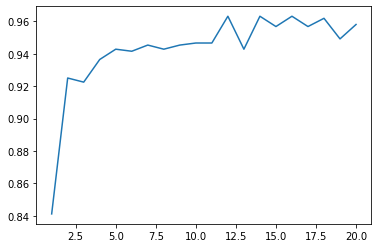

In [ ]:
plot_learning_curve(history, Epochs)

In [ ]:
Epochs = 30
model = Sequential()
model.add(Conv1D(32, 2, activation="relu",
                 input_shape= x_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
history = model.fit(x_train, y_train, epochs=Epochs,
                    validation_data=(x_test, y_test), verbose=1)

In [ ]:
plot_learning_curve(history, Epochs)